In [110]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [111]:
a = np.array(([0,1,1,0,1,1,1], [1,0,0,0,1,0,1], [0,0,0,1,1,0,0], [0,0,0,0,0,0,1], [0,1,0,1,0,1,0], [0,0,0,0,1,0,0], [1,0,0,0,0,0,0]))

In [112]:
G = nx.from_numpy_array(a)

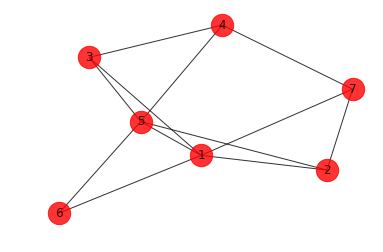

In [113]:
plt.subplot()
mapping={0:1,1:2,2:3,3:4,4:5,5:6,6:7}
H=nx.relabel_nodes(G,mapping)
nx.draw(H, with_labels=True, node_color='r', node_size=500, alpha=0.8)

In [122]:
def pageRank(a, d, epsilon=10**(-6)):
    N = len(a)
    col_sums = [sum(a[:,i]) for i in range(N)]
    m = a / col_sums
    R = np.ones(N) / N
    R_new = (np.ones(N) - d) / N + d * m@R
    i = 1
    while np.linalg.norm(R - R_new) > epsilon:
        R = R_new
        R_new = (np.ones(N) - d) / N + d * m@R
        i+=1
    print(f'Converged in {i} iterations.')
    nodes = [(i+1,R_new[i]) for i in range(N)]
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes

In [124]:
nodes = pageRank(b, 0.85)

Converged in 26 iterations.


In [127]:
for node in nodes: print(f'vertex {node[0]}: {node[1]}')

vertex 1: 0.2811733092300525
vertex 2: 0.21547321193371546
vertex 5: 0.16290092278273197
vertex 7: 0.14092741723721836
vertex 3: 0.08212220126264161
vertex 4: 0.06135791559661424
vertex 6: 0.05604502195702572
